# Autoencoder With CNN

In [1]:
# Importing tensorflow
import tensorflow as tf
# Importing some more libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## Load the data

In [2]:
from keras.datasets import mnist
import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()

## Import dataset MNIST-Fashion dataset
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

x_train= x_train.reshape(-1, 28, 28, 1)
x_test= x_test.reshape(-1, 28, 28, 1)


(60000, 784)
(10000, 784)


In [3]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

def compare(original, encoded, decoded, n=10):
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(original[i].reshape(28, 28),cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded[i].reshape(28, 28),cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()




## A deep autoencoder with convolutions

In [4]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 13s 16ms/step - loss: 0.3517 - val_loss: 0.3072
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.3010 - val_loss: 0.2994
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2953 - val_loss: 0.2955
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2922 - val_loss: 0.2931
Epoch 5/30
469/469 [==============================] - 6s 14ms/step - loss: 0.2901 - val_loss: 0.2914
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2886 - val_loss: 0.2900
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2874 - val_loss: 0.2888
Epoch 8/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2865 - val_loss: 0.2885
Epoch 9/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2856 - val_loss: 0.2877
Epoch 10/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2849 - val_l

313/313 [==============================] - 2s 5ms/step


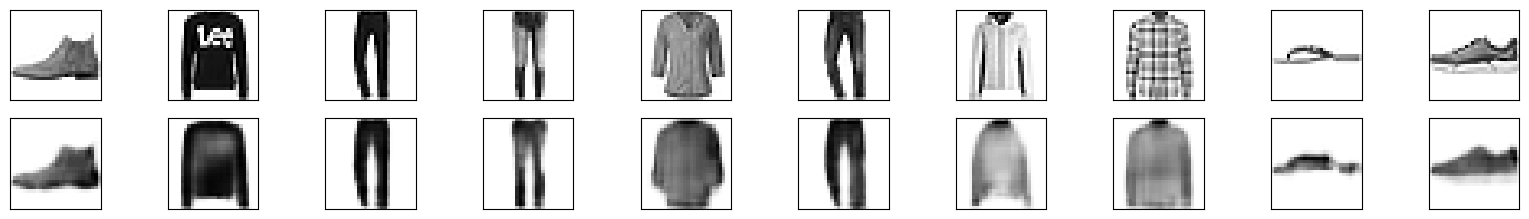

In [6]:
decoded_imgs = autoencoder.predict(x_test)
compare(x_test, np.ones((32,32)), decoded_imgs, 10)